In [1172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [1173]:
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Profile

In [1174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**The dataset has 13 columns and 10841 rows, based on the report only Rating feature has numerical type and other features are categorical**  

In [1175]:
df_columns = df.columns
df_columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [1176]:
# Seperate numerical data from categorical data 
cat_cols = [x for x in df.columns if df[x].dtype=='O']
num_cols = [x for x in df.columns if df[x].dtype!='O']

In [1177]:
print(f'List of Categorical columns: \n{cat_cols} \n\nList of Numerical columns: \n{num_cols}')

List of Categorical columns: 
['App', 'Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'] 

List of Numerical columns: 
['Rating']


In [1178]:
# check description of numerical data 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


In [1179]:
df[cat_cols].describe().T

,count,unique,top,freq
App,10841,9660,ROBLOX,9
Category,10841,34,FAMILY,1972
Reviews,10841,6002,0,596
Size,10841,462,Varies with device,1695
Installs,10841,22,"1,000,000+",1579
Type,10840,3,Free,10039
Price,10841,93,0,10040
Content Rating,10840,6,Everyone,8714
Genres,10841,120,Tools,842
Last Updated,10841,1378,"August 3, 2018",326


In [1180]:
# checking number of categoriy 
df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

**The report shows number of categories are high and based on the data we need to change the type of some features to numerical they will be reviews, size, price and install. Moreover the Last Updated colunm to datetime data**

In [1181]:
# finding missing values
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

**There are some missing value in Rating, Type, content Rating, Current ver and Android Ver features, but Rating column has the hieghest number of missing value**

In [1182]:
# detect duplicate recods
df.duplicated().sum()

483

**There are some duplicated value which need to remove from data durig preprocessing**

In [1183]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True , inplace= True)

In [1184]:
df.memory_usage()

Index               128
App               82864
Category          82864
Rating            82864
Reviews           82864
Size              82864
Installs          82864
Type              82864
Price             82864
Content Rating    82864
Genres            82864
Last Updated      82864
Current Ver       82864
Android Ver       82864
dtype: int64

## Statistical analysis

In [1185]:
df.corr()

,Rating
Rating,1.0


**As we only have one numerical data then statistic functions dont give any specific information but Size, Price and Installs columns keep numarical value but they need some modification before change their types**

## Visualization

In [1186]:
df_columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [1187]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

**The last catgory shows the propability of some error in data then we should check it more deeply**

In [1188]:
df[df['Category']== '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9990,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


**It is clear that data in this record one column shifted and the Category column must be Null in instead of '1.9'. Then we need to solve this issue by shifting values of columns** 

In [1189]:
idx = df[df['Category']== '1.9'].index
new_row = df.iloc[idx].values
new_row = np.insert(new_row, 1 , np.nan)
df.iloc[idx] = new_row[:-1]

In [1190]:
df[df['Category']== '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


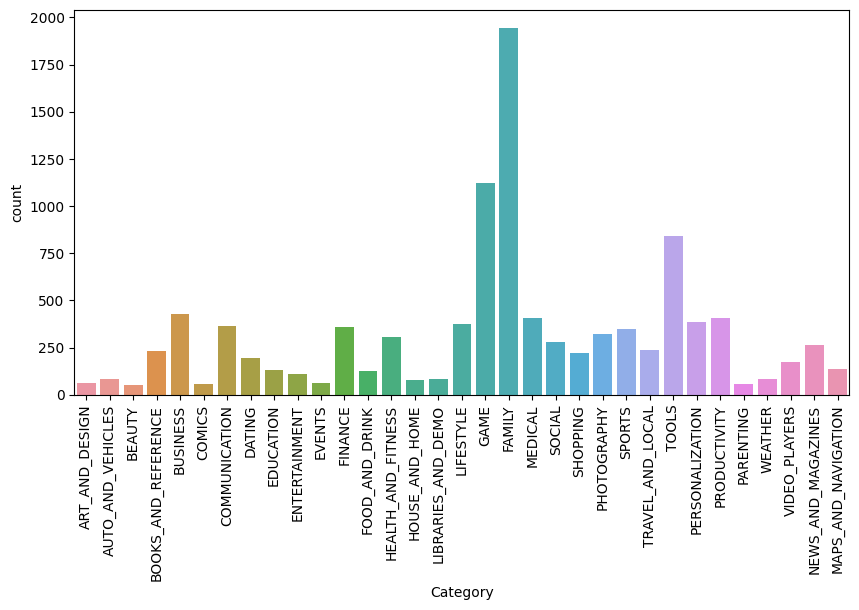

In [1191]:
plt.figure(figsize=(10,5))
sns.countplot(df , x = df['Category'])
plt.xticks(rotation = 90);

**The Family category contain the most number of apps and after it Game and tools caregories have higher number of apps**

In [1192]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [1193]:
df['Reviews'] = pd.to_numeric(df['Reviews'])

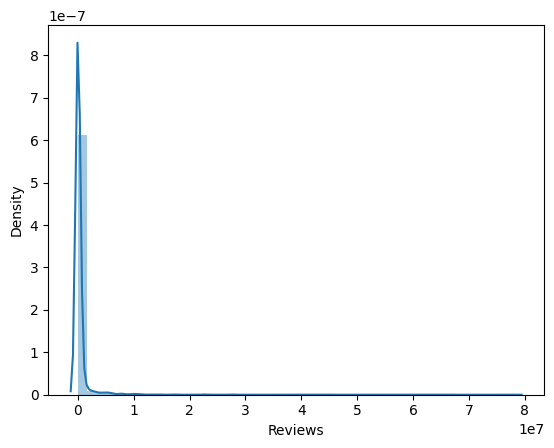

In [1194]:
sns.distplot(df['Reviews']);

<AxesSubplot: >

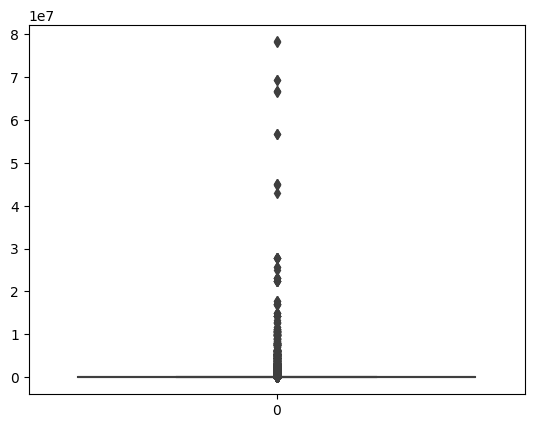

In [1195]:
sns.boxplot(df['Reviews'])

**Data of Review is skew and it need to solve**

In [1196]:
df['Size'].unique()[:50]

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M'],
      dtype=object)

** The data of size has different scale, we need find the sclale of each value and convert them and make all of the similar.**

In [1197]:
new_size = []
for x in df['Size'] :
        if x[-1].lower() =='k':
            new_size.append(float(x[:-1])/1000)
        elif x[-1].lower() =='m' :
            new_size.append(float(x[:-1]))
        else:
            new_size.append(np.nan)
df['Size'] = new_size

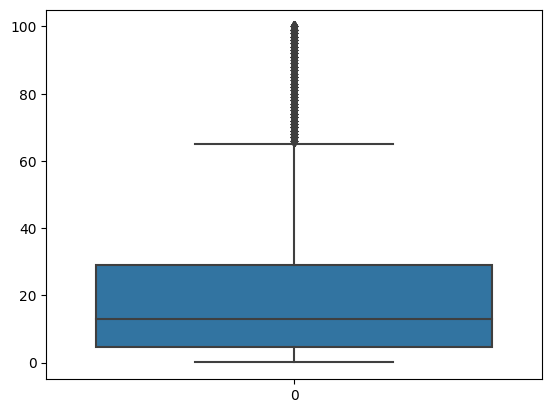

In [1198]:
sns.boxplot(df['Size']);

In [1199]:
df['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10353         5,000+
10354           100+
10355         1,000+
10356         1,000+
10357    10,000,000+
Name: Installs, Length: 10358, dtype: object

In [1200]:
set([x[-1] for x in df['Installs']])

{'+', '0'}

**For converting Instlls field to munerical we need to remove + symbol.**

In [1201]:
new_Installs = []
for x in df['Installs'] :
    temp = x.replace('+', '')
    temp = temp.replace(',' , '')
    new_Installs.append(float(temp))
df['Installs'] = new_Installs

In [1202]:
df['Installs']

0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10353        5000.0
10354         100.0
10355        1000.0
10356        1000.0
10357    10000000.0
Name: Installs, Length: 10358, dtype: float64

<AxesSubplot: xlabel='Installs', ylabel='Density'>

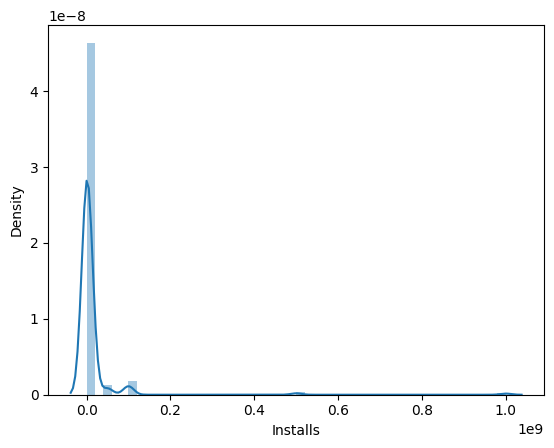

In [1203]:
sns.distplot(df['Installs'])

**Installs columns is skew too.**

In [1204]:
df['Type'].value_counts()

Free    9592
Paid     765
Name: Type, dtype: int64

<AxesSubplot: xlabel='Type', ylabel='count'>

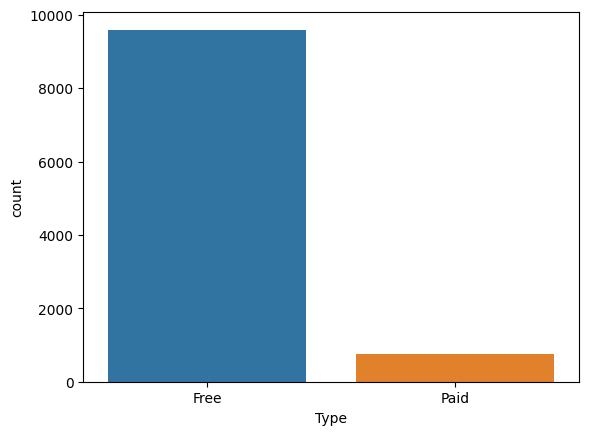

In [1205]:
sns.countplot(df, x = df['Type'])

**Data is imbalance based on the Type column**

In [1206]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

**Symbol of $ also should reove from this field before changing it to numerical**

In [1207]:
new_price = []
for x in df['Price'] :
    temp = x.replace('$', '')
    new_price.append(float(temp))
df['Price'] = new_price

<AxesSubplot: xlabel='Price', ylabel='Density'>

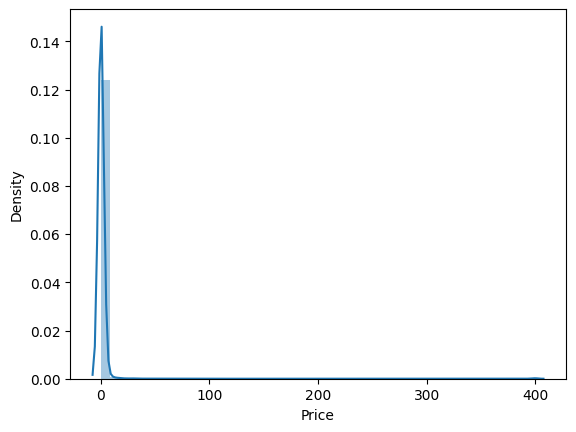

In [1208]:
sns.distplot(df['Price'])

In [1209]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

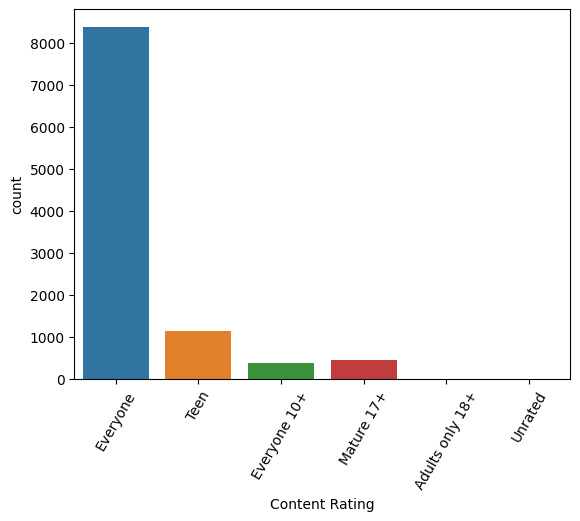

In [1210]:
sns.countplot(df, x= df['Content Rating'])
plt.xticks(rotation = 60);

In [1211]:
print('Genres Group: ', df['Genres'].unique())
print('Number of Genres groups: ',df['Genres'].nunique() )

Genres Group:  ['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Art & Design;Action & Adventure' 'Auto & Vehicles' 'Beauty'
 'Books & Reference' 'Business' 'Comics' 'Comics;Creativity'
 'Communication' 'Dating' 'Education;Education' 'Education'
 'Education;Creativity' 'Education;Music & Video'
 'Education;Action & Adventure' 'Education;Pretend Play'
 'Education;Brain Games' 'Entertainment' 'Entertainment;Music & Video'
 'Entertainment;Brain Games' 'Entertainment;Creativity' 'Events' 'Finance'
 'Food & Drink' 'Health & Fitness' 'House & Home' 'Libraries & Demo'
 'Lifestyle' 'Lifestyle;Pretend Play' 'Adventure;Action & Adventure'
 'Arcade' 'Casual' 'Card' 'Casual;Pretend Play' 'Action' 'Strategy'
 'Puzzle' 'Sports' 'Music' 'Word' 'Racing' 'Casual;Creativity'
 'Casual;Action & Adventure' 'Simulation' 'Adventure' 'Board' 'Trivia'
 'Role Playing' 'Simulation;Education' 'Action;Action & Adventure'
 'Casual;Brain Games' 'Simulation;Action & Adventure'
 'Educational;Crea

In [1212]:
df['Genres'].value_counts().values

array([842, 588, 527, 427, 408, 407, 388, 372, 366, 364, 360, 356, 322,
       306, 280, 264, 236, 230, 224, 218, 199, 196, 191, 173, 137, 136,
       124, 109, 105,  98,  85,  85,  82,  80,  75,  64,  59,  58,  53,
        48,  46,  44,  44,  39,  38,  38,  37,  30,  28,  23,  21,  20,
        18,  18,  18,  16,  15,  15,  15,  13,  13,  10,   8,   7,   7,
         7,   7,   6,   6,   5,   5,   5,   5,   5,   4,   4,   4,   4,
         4,   3,   3,   3,   3,   3,   3,   3,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1], dtype=int64)

**Some of the groups happened only one time or less than 10 times , also the data of this column is so similar to Category columns which need more attention during feature selection.** 

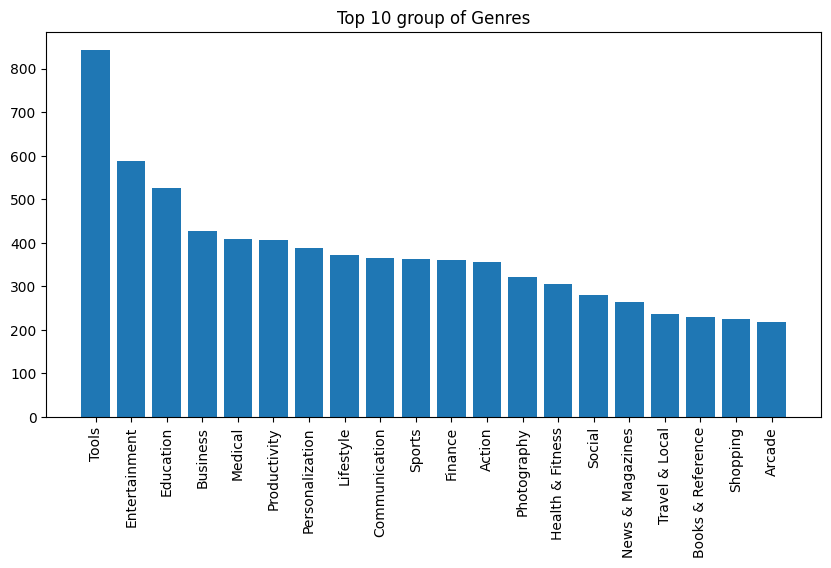

In [1213]:
plt.figure(figsize=(10, 5))
genres = df['Genres'].value_counts()
plt.bar(genres.index[:20] , genres[:20])
plt.xticks(rotation = 90)
plt.title('Top 10 group of Genres');

In [1214]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

In [1215]:
df['Last Updated'].min() , df['Last Updated'].max()

(Timestamp('2010-05-21 00:00:00'), Timestamp('2018-08-08 00:00:00'))

In [1216]:
df['Last Updated'].nunique()

1377

<AxesSubplot: xlabel='Last Updated', ylabel='Count'>

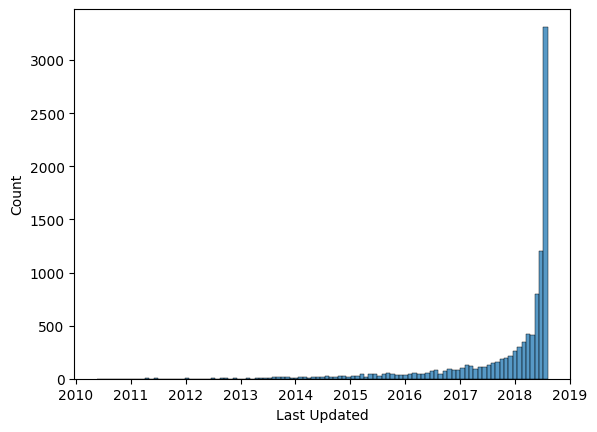

In [1217]:
sns.histplot(df, x = df['Last Updated'])

**some of the app has not updated since 5 years ago then in graph some left skew has shown.** 

## Biovariate

In [1218]:
df.groupby(['Type'])['Price'].sum()

Type
Free        0.0
Paid    10676.0
Name: Price, dtype: float64

<AxesSubplot: xlabel='Type', ylabel='Price'>

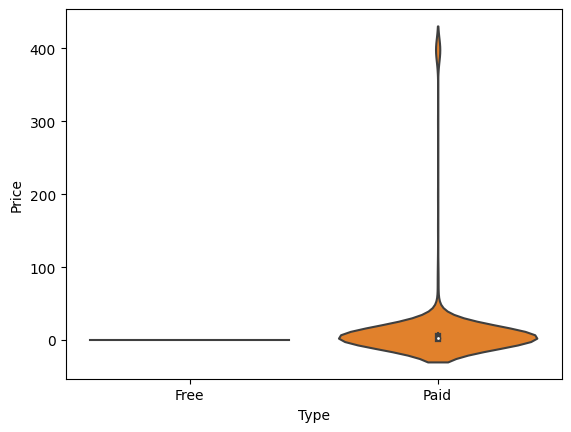

In [1219]:
sns.violinplot(df, x = df['Type'] , y = df['Price'] )

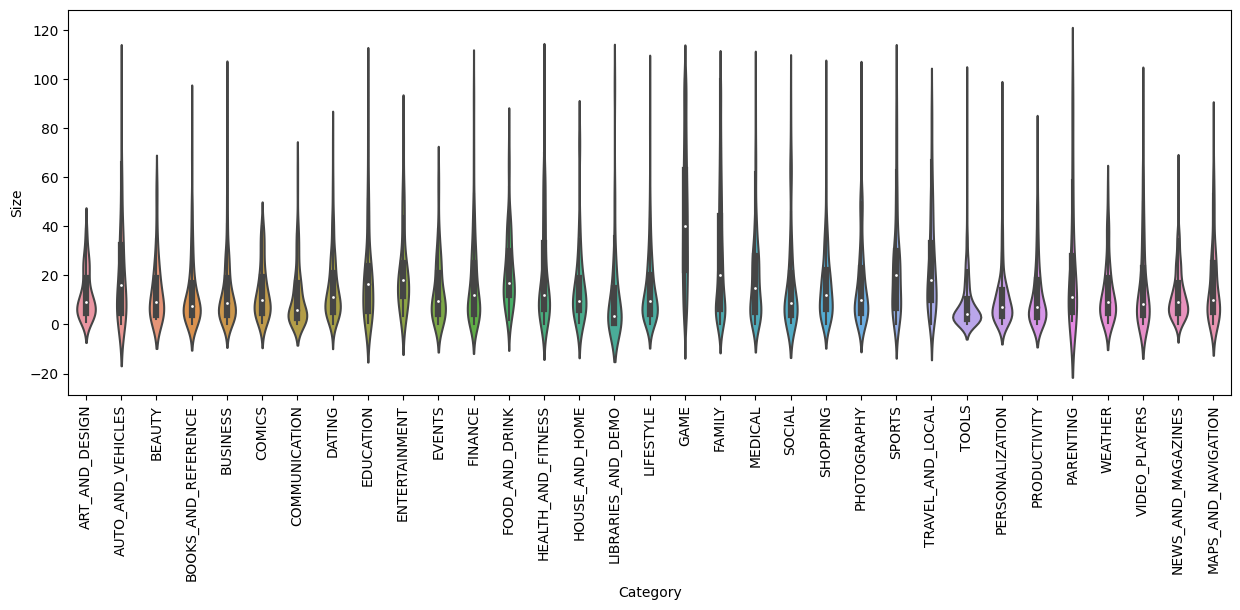

In [1220]:
plt.figure(figsize=(15,5))
sns.violinplot(df, x = df['Category'] , y = df['Size'] )
plt.xticks(rotation = 90);

**Size of the app per category has normal distribution but some outliers also are observed** 

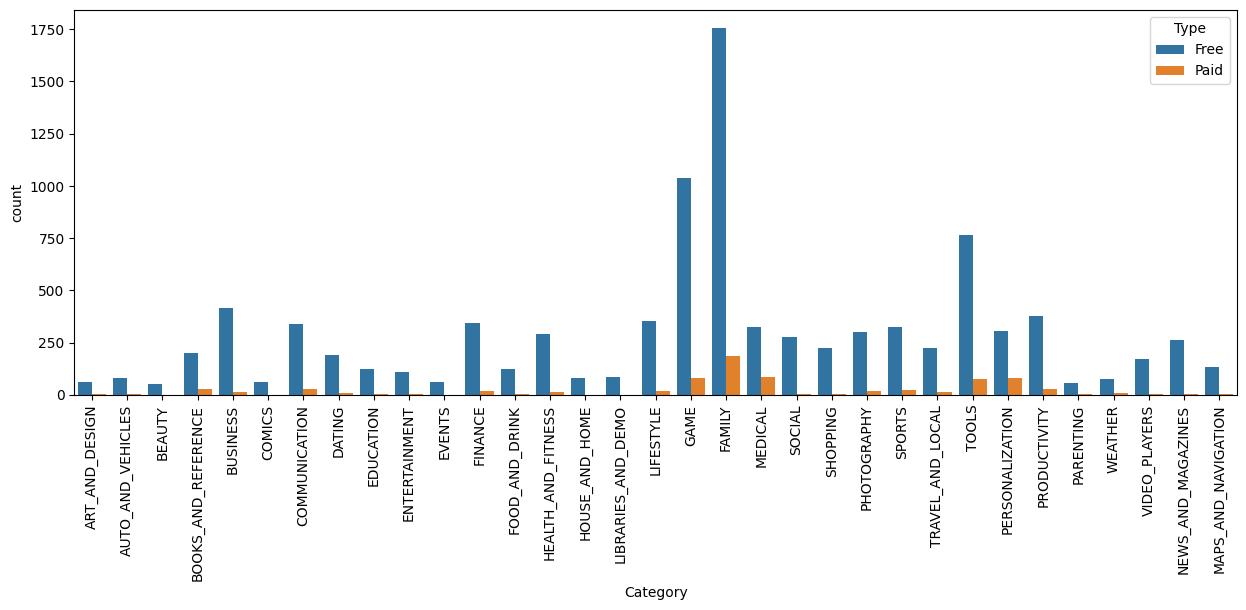

In [1221]:
plt.figure(figsize=(15,5))
sns.countplot(df, x = df['Category'], hue = df['Type'] )
plt.xticks(rotation = 90);

**Number of free apps are more than Piad one per category but they follow same trend, the more free apps in one group the more paid apps are observed in same category**

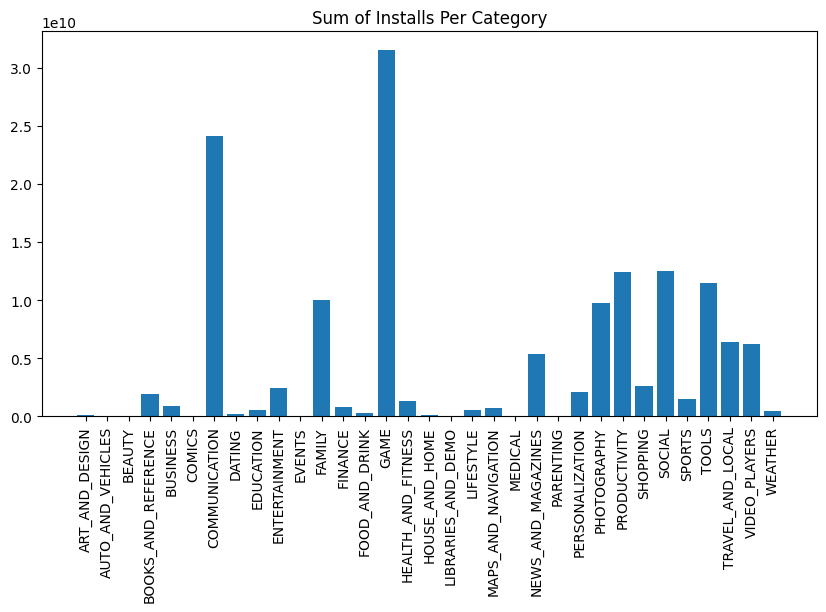

In [1222]:
Install_percategory = df.groupby(['Category'])['Installs'].sum()
plt.figure(figsize=(10,5))
plt.bar(Install_percategory.index , Install_percategory)
plt.xticks(rotation = 90)
plt.title('Sum of Installs Per Category');

**The Communication and Game categories have most installed apps. After them Productivity, social with far distance are the most installed categories.**

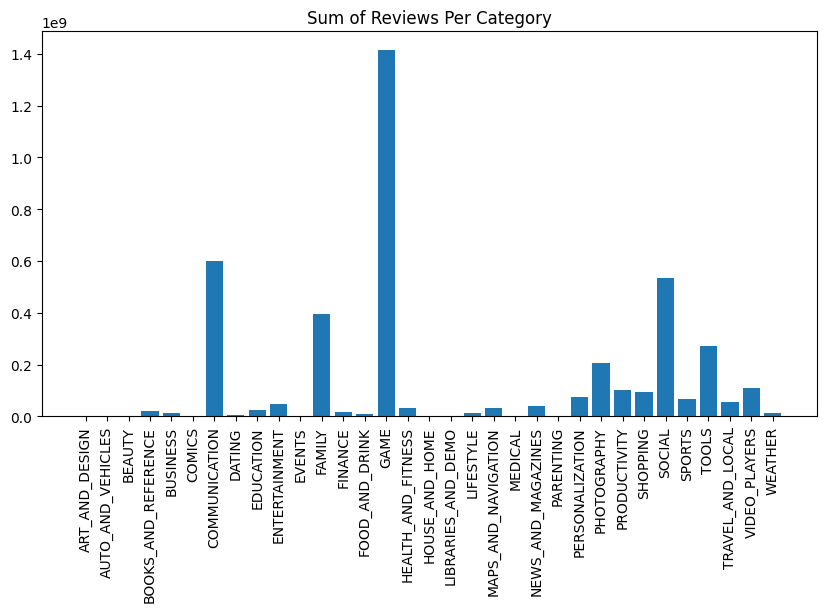

In [1223]:
reviews_percategory = df.groupby(['Category'])['Reviews'].sum()
plt.figure(figsize=(10,5))
plt.bar(reviews_percategory.index , reviews_percategory)
plt.xticks(rotation = 90)
plt.title('Sum of Reviews Per Category');

**Game category apps have collected the most reviews as compare to other categories andComunication and social stand in second and third stage with big distance.** 

## MultiVariate Visualization

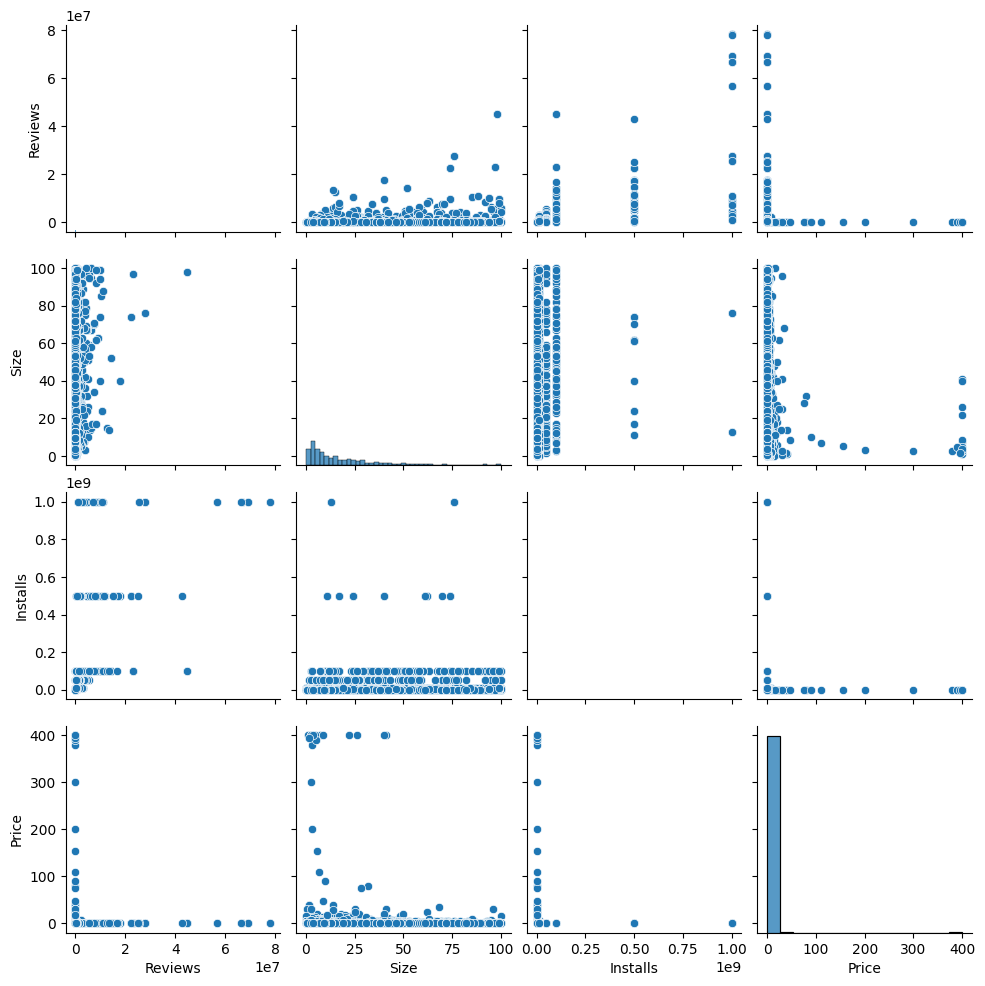

In [1143]:
sns.pairplot(df)

In [1144]:
df.corr()

,Reviews,Size,Installs,Price
Reviews,1.000000,0.237897,0.634998,-0.009416
Size,0.237897,1.000000,0.168880,-0.023760
Installs,0.634998,0.168880,1.000000,-0.011146
Price,-0.009416,-0.023760,-0.011146,1.000000


In [1145]:
df.cov()

,Reviews,Size,Installs,Price
Reviews,7.271924e+12,8.589331e+06,1.373932e+14,-4.133256e+05
Size,8.589331e+06,5.080431e+02,1.619638e+08,-9.436059e+00
Installs,1.373932e+14,1.619638e+08,6.437784e+15,-1.455694e+07
Price,-4.133256e+05,-9.436059e+00,-1.455694e+07,2.649682e+02


In [1147]:
df.skew()

Rating      -1.825680
Reviews     17.468164
Size         1.569977
Installs    10.127199
Price       23.325511
dtype: float64

<AxesSubplot: >

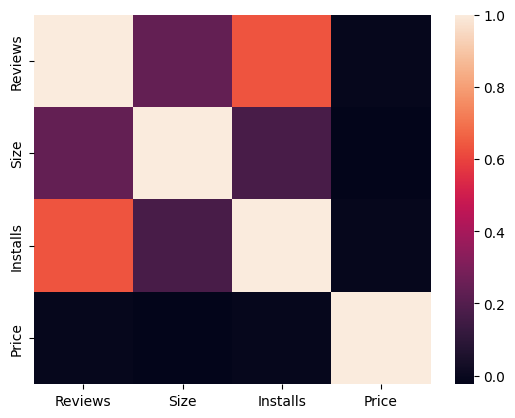

In [1146]:
sns.heatmap(df.corr())

**There is not any powerful positive and negative relation between numerical variables, the only some mild relation exist between Inistalls and Reviews**

## Handeling missing values

In [1224]:
df.isna().sum()

App                  0
Category             1
Rating            1465
Reviews              0
Size              1526
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [1225]:
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 2.6, 3.0, 1.9, 2.5, 2.8,
       2.7, 1.0, 2.9, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2, '1.9'], dtype=object)

In [1226]:
df['Rating'].replace('1.9', 1.9, inplace = True)
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [1227]:
df['Rating'].mean(), df['Rating'].median()

(4.187619475992354, 4.3)

In [1228]:
df.groupby(['Category'])['Rating'].median()

Category
ART_AND_DESIGN         4.40
AUTO_AND_VEHICLES      4.30
BEAUTY                 4.30
BOOKS_AND_REFERENCE    4.50
BUSINESS               4.25
COMICS                 4.40
COMMUNICATION          4.30
DATING                 4.10
EDUCATION              4.40
ENTERTAINMENT          4.20
EVENTS                 4.50
FAMILY                 4.30
FINANCE                4.30
FOOD_AND_DRINK         4.30
GAME                   4.30
HEALTH_AND_FITNESS     4.50
HOUSE_AND_HOME         4.20
LIBRARIES_AND_DEMO     4.20
LIFESTYLE              4.20
MAPS_AND_NAVIGATION    4.20
MEDICAL                4.30
NEWS_AND_MAGAZINES     4.20
PARENTING              4.40
PERSONALIZATION        4.40
PHOTOGRAPHY            4.30
PRODUCTIVITY           4.30
SHOPPING               4.30
SOCIAL                 4.30
SPORTS                 4.30
TOOLS                  4.20
TRAVEL_AND_LOCAL       4.20
VIDEO_PLAYERS          4.20
WEATHER                4.30
Name: Rating, dtype: float64

**The mean and median are so close then we can select either of them for filling missing values. In addition, the mean and median per Category filed also is same then replace missing value with median**

In [1229]:
df['Rating'].fillna(df['Rating'].median(), inplace =True)

In [1230]:
df['Size'].mean() , df['Size'].median()

(21.28571767436594, 13.0)

In [1231]:
df.groupby(['Type'])['Size'].mean()

Type
Free    21.469151
Paid    19.124602
Name: Size, dtype: float64

In [1232]:
size_category = df.groupby(['Category'])['Size'].median()
size_category

Category
ART_AND_DESIGN          8.95
AUTO_AND_VEHICLES      16.00
BEAUTY                  9.20
BOOKS_AND_REFERENCE     7.35
BUSINESS                8.60
COMICS                 10.00
COMMUNICATION           5.90
DATING                 11.00
EDUCATION              16.50
ENTERTAINMENT          18.00
EVENTS                  9.70
FAMILY                 20.00
FINANCE                12.00
FOOD_AND_DRINK         17.00
GAME                   40.00
HEALTH_AND_FITNESS     12.00
HOUSE_AND_HOME          9.45
LIBRARIES_AND_DEMO      3.25
LIFESTYLE               9.70
MAPS_AND_NAVIGATION     9.85
MEDICAL                15.00
NEWS_AND_MAGAZINES      9.10
PARENTING              11.00
PERSONALIZATION         7.15
PHOTOGRAPHY            10.00
PRODUCTIVITY            7.00
SHOPPING               12.00
SOCIAL                  8.70
SPORTS                 20.00
TOOLS                   4.20
TRAVEL_AND_LOCAL       18.00
VIDEO_PLAYERS           8.50
WEATHER                 9.20
Name: Size, dtype: float64

**Median of Size change with change in category then it is better to fill missig values per median of category.**

In [1233]:
df["Size"] = df.groupby(['Category'])['Size'].transform(lambda x: x.fillna(x.median()))

In [1234]:
df.isna().sum()

App               0
Category          1
Rating            0
Reviews           0
Size              1
Installs          0
Type              1
Price             0
Content Rating    0
Genres            1
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

**Current Ver and Android Ver dont give any useful information and we can drop them, other filed have less missing value then we can drop these records too.**

In [1235]:
df.dropna(subset=['Category'] , axis = 0, inplace = True)
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [1236]:
df[df['Type'].isna()==True]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8667,Command & Conquer: Rivals,FAMILY,4.3,0.0,20.0,0.0,NaN,0.0,Everyone 10+,Strategy,2018-06-28,Varies with device,Varies with device


**Consider to Price =0 then we can set this NaN value to 'free'**

In [1237]:
df['Type'].fillna('Free', inplace = True)

In [1238]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

### Drop unnecessary columns

In [1239]:
df.drop(['Current Ver', 'Android Ver'],axis = 1 , inplace = True)

## Handling Outliers

In [1164]:
def outliers_hadling(data, columns_name, q1_range= 0.25 , q3_range= 0.75):
    for col in columns_name :
        Q1 = data[col].quantile(q1_range)
        Q3 = data[col].quantile(q3_range)
        IQR = Q3 - Q1
        upper_limit=Q3 + (1.5 * IQR)
        lower_limit=Q1 - (1.5 * IQR)
        data.loc[data[col]<lower_limit,col]=lower_limit
        data.loc[data[col]>upper_limit,col]=upper_limit
    return data

In [1165]:
df_final = outliers_hadling(df, ['Size', 'Installs','Reviews'])

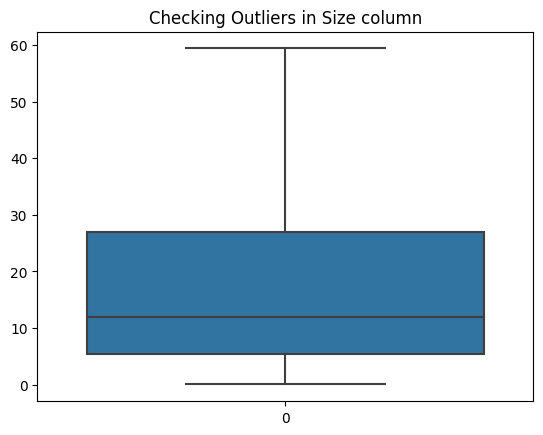

In [1166]:
sns.boxplot(df_final['Size'])
plt.title('Checking Outliers in Size column');

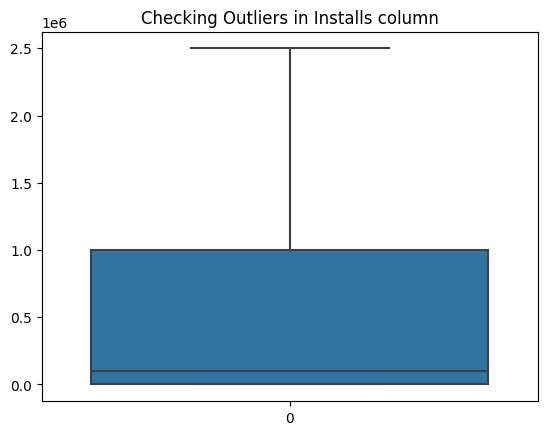

In [1167]:
sns.boxplot(df_final['Installs'])
plt.title('Checking Outliers in Installs column');

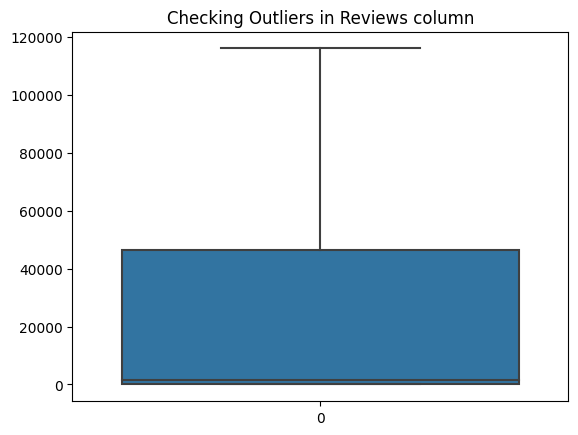

In [1270]:
sns.boxplot(df_final['Reviews'])
plt.title('Checking Outliers in Reviews column');

In [1169]:
df_final.to_csv('Google_cleandata.csv')